# Modelo de Fitzhugh-Nagumo

In [5]:
%display typeset

<p>O modelo de Fitzhugh Nagumo &eacute; um elegante modelo de um sistema excit&aacute;vel. Hist&oacute;ricamente foi desenvolvido de um esfor&ccedil;o por simplificar o modelo original de Hodgkin-Huxley mantendo suas propriedades din&acirc;micas intactas. Mas este modelo &eacute; um ponto de partida para o estudo do fen&ocirc;meno da excitabilidade que, sendo bastante comum em biologia, n&atilde;o se restringe &agrave; eletrofisiologia dos neur&ocirc;nios.</p>
<p><img src="http://www.scholarpedia.org/w/images/e/e4/Richard_FitzHugh_analog_computer.jpg" alt="Computador anal&oacute;gico usado por Richard Fitzhugh." width="571" height="706" /></p>
<p>Richard Fitzhugh com o computador anal&oacute;gico usado para calcular o modelo.</p>
<h4>O que &eacute; excitabilidade?&nbsp;</h4>
<p>Um sistema excit&aacute;vel pode ser descrito como um sistema din&acirc;mico que possui um estado de repouso para o qual sempre retorna ap&oacute;s sofrer pequenas pertuba&ccedil;&otilde;es. Entretanto se a perturba&ccedil;&atilde;o ou est&iacute;mulo ultrapassar seu limiar de excitabilidade, o sistma far&aacute; uma excurs&atilde;o mais longa pelo espa&ccedil;o de estados antes de retornar ao seu estado de repouso. Durante esta escurs&atilde;o ser&aacute; refrat&aacute;rio a novos est&iacute;mulos, ou seja, novos est&iacute;mulos n&atilde;o afetar&atilde;o sua trajet&oacute;ria. Mas ap&oacute;s retornar ao repouso, estar&aacute; sujeito a uma nova excita&ccedil;&atilde;o.</p>
<p>O modelo de Fitzhugh-Nagumo consiste em duas equa&ccedil;&otilde;es apenas. A primeira busca representar a excita&ccedil;&atilde;o do sistema:</p>
<p>$$\frac{dx}{dt} = c \left(x-\frac{1}{3}x^3 \right)$$</p>
<p>Esta equa&ccedil;&atilde;o admite 3 equil&iacute;brios:</p>

In [6]:
var('c')
solve(c*(x-x^3/3),x)

[x == -sqrt(3), x == sqrt(3), x == 0]

/home/fccoelho/Downloads/SageMath/local/lib/python3.7/site-packages/sage/plot/graphics.py:2420: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/home/fccoelho/Downloads/SageMath/local/lib/python3.7/site-packages/sage/plot/graphics.py:2445: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


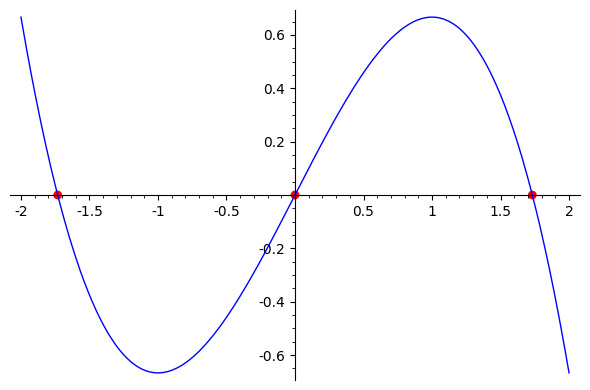

In [7]:
p=plot(1*(x-x^3/3),(-2,2))
po = point([(-sqrt(3),0),(0,0),(sqrt(3),0)],color='red',pointsize=40)
show(p+po)

<p>Pelo gr&aacute;fico, podemos ver que temos dois equil&iacute;brios est&aacute;veis ($x=\pm \sqrt{3}$) e um inst&aacute;vel ($x=0$). Mas esta equa&ccedil;&atilde;o sozinha, nos d&aacute; uma sistema bist&aacute;vel, e n&atilde;o um excit&aacute;vel. Para isso temos que acrescentar uma vari&aacute;vel, $y$, de "recupera&ccedil;&atilde;o", que neutralize a excita&ccedil;&atilde;o e leve o sistema de volta para o equil&iacute;brio de "repouso".</p>
<p>$$\frac{dx}{dt} = c \left(x-\frac{1}{3}x^3 -y + j \right)$$</p>
<p>$$\frac{dy}{dt}=\frac{1}{c}(x+a-by)$$</p>
<p>o par&acirc;metro j representa o est&iacute;mulo externo, no caso do neur&ocirc;nio a correte de despolariza&ccedil;&atilde;o injetada na c&eacute;lula. Os par&acirc;metros $a$ e $b$ s&atilde;o positivos e tomam valores preferencialmente nas seguintes faixas: $1-\frac{2b}{3} \lt a \lt 1$ e $0 \lt b \lt 1$. A forma como $c$ aparece em ambas as equa&ccedil;&otilde;es serve para ajustarmos a intensidade da excitabilidade em rela&ccedil;&atilde;o &agrave; recupera&ccedil;&atilde;o. Aumentando $c$, aumentamos a excitabilidade e diminuimos a recupera&ccedil;&atilde;o.</p>
<h2>An&aacute;lise no Plano de Fase</h2>
<p>Para nos ajudar nesta an&aacute;lise, vamos definir as nuliclinas de ambas as vari&aacute;veis:</p>
<p>$$\frac{dy}{dt}=0 \Rightarrow y = \frac{1}{b}x + \frac{a}{b}$$</p>
<p>$$\frac{dx}{dt}=0 \Rightarrow y= x- \frac{1}{3}x^3 +j$$</p>
<p>&nbsp;</p>
<p>Note que o par&acirc;metro $c$ n&atilde;o afeta nenhuma das nuliclinas.</p>

In [8]:
var('x y a b c j')
dxdt = c*((x-(x**3)/3)-y+j)
solve(dxdt,y)

[y == -1/3*x^3 + j + x]

In [9]:
dydt = (x+a-b*y)/c
solve(dydt,y)

[y == (a + x)/b]

/home/fccoelho/Downloads/SageMath/local/lib/python3.7/site-packages/sage/plot/graphics.py:2420: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/home/fccoelho/Downloads/SageMath/local/lib/python3.7/site-packages/sage/plot/graphics.py:2445: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


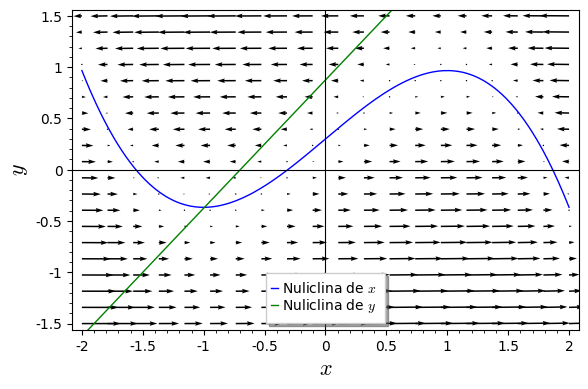

In [10]:
var('y')
c=10
j=0.3
a=.7
b=.8
vf = plot_vector_field([c*((x-(x**3)/3)-y+j),(x+a-b*y)/c],(x,-2,2),(y,-1.5,1.5),axes_labels=[r'$x$',r'$y$'])
xnull = plot(x-x^3/3+j,(-2,2),color='blue',ymin=-1.5,ymax=1.5, legend_label="Nuliclina de $x$")
ynull = plot((a+x)/b,(-2,2),color='green',ymin=-1.5,ymax=1.5, legend_label="Nuliclina de $y$")
show(vf+xnull+ynull)

A interseção entre as nuliclinas é um equilíbrio do systema. Podemos calcular o seu valor.

In [11]:
sols=solve([dxdt(a=a,b=b,c=c,j=j),dydt(a=a,b=b,c=c)],[x,y])
for sol in sols:
    show(sol)

[x == (0.4966487372747987 + 1.220647330194089*I),
 y == (1.495810921593498 + 1.525809162742611*I)]

[x == (0.4966487372747987 - 1.220647330194089*I),
 y == (1.495810921593498 - 1.525809162742611*I)]

[x == -0.9932974689126025, y == -0.3666218551949299]

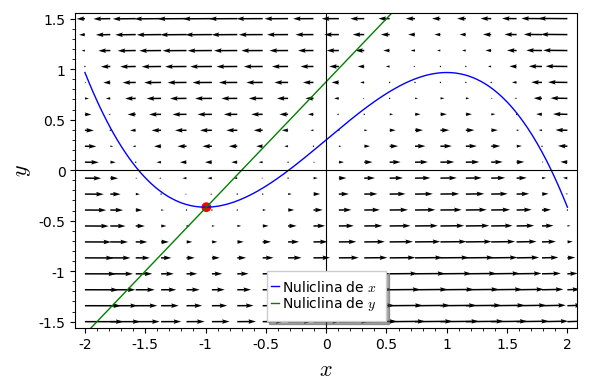

In [5]:
pe = point((sol[0].rhs(),sol[1].rhs()), color='red',pointsize=50)
show(vf+xnull+ynull+pe)

Vamos calcular a Jacobiana do sistema:

In [12]:
Jac = jacobian([dxdt,dydt], [x,y])
Jac

[-(x^2 - 1)*c           -c]
[         1/c         -b/c]

In [13]:
eqx = -0.9932974689126025
Jac(x=eqx,b=b,c=c).eigenvalues()

[-1/1470389350*I*sqrt(2137383719017539699) + 39407451/1470389350,
 1/1470389350*I*sqrt(2137383719017539699) + 39407451/1470389350]

In [14]:
def fun(t,Y, params):
    x, y = Y
    c,j,a,b=params
    #j=0.9*(heaviside(t-20)-heaviside(t-50))
    return[
    c*(x-x**3/3-y+j),
    (x+a-b*y)/c
    ]
jfun = lambda t,st,p: jacobian([c*((x-(x**3)/3)-y+j),(x+a-b*y)/c], [x,y]).subs(x=st[0], c=p[0],j=p[1],a=p[2],b=p[3])
jfun (0,[sol[0].rhs(),sol[1].rhs()],[c,j,a,b])

[ 0.1336013825181741                 -10]
[               1/10 -0.0800000000000000]

In [15]:
T = ode_solver()
T.algorithm='rk8pd'
T.function= fun
T.jacobian = jfun
t_range = [0,80]
y0 = [-1.19940806511,-0.624260036595]#[.5,.5]
T.ode_solve(t_range,y0,params=[3,0.7,.7,.8],num_points=500)

/home/fccoelho/Downloads/SageMath/local/lib/python3.7/site-packages/sage/plot/graphics.py:2420: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  x_formatter = OldScalarFormatter()
/home/fccoelho/Downloads/SageMath/local/lib/python3.7/site-packages/sage/plot/graphics.py:2445: MatplotlibDeprecationWarning: 
The OldScalarFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  y_formatter = OldScalarFormatter()


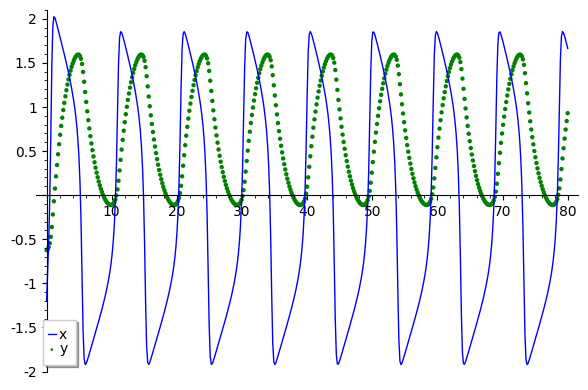

In [16]:
#fun(0,[1.49900000000000,0.0833333333333333],[0.08,0,.7,.8])
px = list_plot([(p[0],p[1][0]) for p in T.solution], plotjoined=True, legend_label="x");
py = list_plot([(p[0],p[1][1]) for p in T.solution], color='green', legend_label="y");
px.legend()
show(px+py);
#print T.solution

In [19]:
@interact
def traj_plot(x0=slider(-2,2,.1, -1.19940806511),y0=slider(-1.5,1.5,.1,-0.624260036595)):
    inits = [x0,y0]#[.5,.5]
    T.ode_solve(t_range,inits,params=[c,j,a,b],num_points=500)
    traj = list_plot([(p[1][0],p[1][1]) for p in T.solution],color="orange", plotjoined=True);
    pi = point([inits[0],inits[1]],color='green', pointsize=50)
    show(vf+xnull+ynull+traj+pi)

Interactive function <function traj_plot at 0x7f6dbd16f598> with 2 widgets
  x0: TransformFloatSlider(value=-1…

In [20]:
T = ode_solver()
T.algorithm='rk8pd'
#cfun = nagumo_C(0.4)
T.function= fun
t_range = [0,80]
y0 = [-1.19940806511,-0.624260036595]
T.ode_solve(t_range,y0,params=[3,0.4,.7,.8],num_points=500)

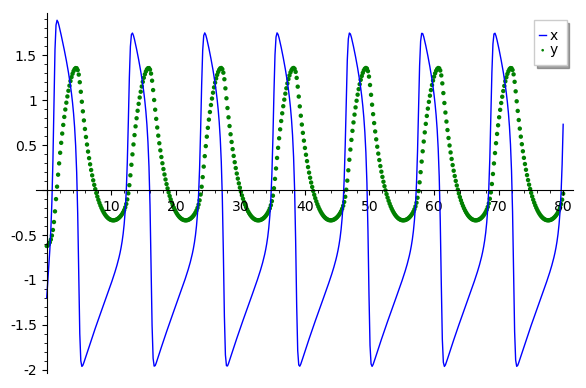

In [49]:
px = list_plot([(p[0],p[1][0]) for p in T.solution], plotjoined=True, legend_label="x");
py = list_plot([(p[0],p[1][1]) for p in T.solution], color='green', legend_label="y");
show(px+py);

In [13]:
import numpy as np
@interact
def bifurcation(j_min=slider(0,1,0.01,0),j_max=slider(0,2,0.01,1.4)):
    T = ode_solver()
    T.algorithm='rk8pd'
    pts = []
    for j in np.linspace(j_min,j_max,200):
        #cfun = nagumo_C(j)
        T.function= fun
        t_range = [0,50]
        y0 = [-1.19940806511,-0.624260036595]
        T.ode_solve(t_range,y0,params=[3,j,.7,.8], num_points=200)
        sol = T.solution
        pts += [(j,p[1][0]) for n,p in enumerate(sol[0:]) if abs(p[1][1]-0.5) < 0.01]
    show(points(pts,pointsize=2), gridlines=True)

Interactive function <function bifurcation at 0x7f7283dedd90> with 2 widgets
  j_min: TransformFloatSlider(val…